ValueError: x and y must be the same size

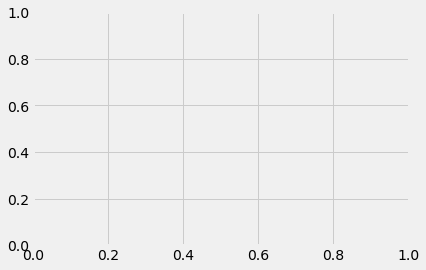

In [11]:
from statistics import mean
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
style.use('fivethirtyeight')
import random

xs = np.array([1,2,3,4,5,6],dtype = np.float64)
ys = np.array([5,4,6,5,6,7],dtype = np.float64)

# hm - how much = how many data points do I wish to create
# varience = how varible do we want the data set to be

def create_dataset(hm, variance, step = 2 ,correlation=False ):
    val = 1 #first value from y = 1 
    ys = []
    for i in range(hm):
        y = val + random.randrange(-variance, variance)# this means that y is equal to the original y plus a random no in
        # the range of the variance
        ys.append(y)
        if correlation and correlation == 'pos' :
            val += step
        elif correlation and correlation == 'neg' :
            val -= step
        xs = [i for i in range(len(ys))]
    return np.array(xs, dtype = np.float64), np.array(y, dtype = np.float64 )


def best_fit_slope(xs,ys):
    m = (((mean(xs)*mean(ys)) - (mean(xs*ys)))/((mean(xs)*mean(xs))-(mean(xs*xs))))
    return m
m = best_fit_slope(xs,ys)
# print(m)
def best_fit_intercept(xs,ys,m):
    b = ((mean(ys))-(m*mean(xs)))
    return b
b = best_fit_intercept(xs,ys,m)
# print(b)

# squared error is the diff b/w the original value of y  and the predicted value of y (h(x))
# for highest accurcy we have to get the minimum value of the cost function J

 

def coefficient_of_determination(ys_orig, ys_line):
    y_mean_line = [mean(ys_orig) for y in ys_orig]
    squared_error_regr = squared_error(ys_orig, ys_line)
    squared_error_y_mean = squared_error(ys_orig, y_mean_line)
    return (1 - (squared_error_regr / squared_error_y_mean ))

xs, ys = create_dataset(40, 40,2 , correlation='pos' )

plt.scatter(xs,ys)
predict_x = 4.2
predict_y = (m*predict_x)+b
plt.scatter(predict_x ,predict_y )
# plt.plot(predict_x ,predict_y)

x = xs
regression_line = [(m*x)+b for x in xs]
# plt.plot(xs, regression_line)
# plt.show()

r_squared = coefficient_of_determination(ys, regression_line)
print(r_squared)

# To determine how good is the best fit line
# to determine the accuracy - R squared or the coefficient of determination - calculated using the squared error

# r^2 = 1 - (SE y^ - SE mean(y))
# we prefer r^2 to be higher because of this the SE term is smaller and therefore SE Y^ is significantly lower than 
# the SE mean(y)

